# Bank Customer Churn Analysis

Churner is generally defined as a customer who stops using a product or service for a given period of time.Churn rate is a measurement of the health of your business.

### Data
The dataset used for the current analysis included historical data for 10000 customers. Each customer had metrics recorded on banking activities and demographic data. This notebook is to do the data analysis and predictions on the churn.csv file.

The first step in the Data Preprocessing is to import the libraries, load the data and do some Exploratory Data Analysis (EDA).

In [1]:
#Import all important Libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/umalviya/Desktop/Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df=df[['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [5]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 12)

In [7]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Select columns containing categorical data
categorical_columns = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.dtypes

CustomerId            int64
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [9]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


In [10]:
# Print unique values for categorical features
print("Unique values for:\n- Geography:", pd.unique(df.Geography.ravel()))
print("- Gender:", pd.unique(df.Gender.ravel()))
print("- Tenure:", pd.unique(df.Tenure.ravel()))
print("- NumOfProducts:", pd.unique(df.NumOfProducts.ravel()))
print("- HasCrCard:", pd.unique(df.HasCrCard.ravel()))
print("- IsActiveMember:", pd.unique(df.IsActiveMember.ravel()))
print("- Exited:", pd.unique(df.Exited.ravel()))

Unique values for:
- Geography: [France, Spain, Germany]
Categories (3, object): [France, Spain, Germany]
- Gender: [Female, Male]
Categories (2, object): [Female, Male]
- Tenure: [2, 1, 8, 7, 4, ..., 3, 10, 5, 9, 0]
Length: 11
Categories (11, int64): [2, 1, 8, 7, ..., 10, 5, 9, 0]
- NumOfProducts: [1, 3, 2, 4]
Categories (4, int64): [1, 3, 2, 4]
- HasCrCard: [1, 0]
Categories (2, int64): [1, 0]
- IsActiveMember: [1, 0]
Categories (2, int64): [1, 0]
- Exited: [1, 0]
Categories (2, int64): [1, 0]


In [11]:
df.describe()

,CustomerId,CreditScore,Age,Balance,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,76485.889288,100090.239881
std,7.193619e+04,96.653299,10.487806,62397.405202,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,97198.540000,100193.915000
75%,1.575323e+07,718.000000,44.000000,127644.240000,149388.247500
max,1.581569e+07,850.000000,92.000000,250898.090000,199992.480000


# Inference Drawn :

* There are 10,000 customers info in the data sets.
* The bank's youngest customer is a 18 year old and it's eldest is 92.
* All the customers whose information were include in the datasets have transacted within the tenure of 10 years.
* Customers with lowest credit score of 350 and highest credit score of 850.
* Bank has maximum balance of 250898€ and minimum balance of 0€.
* Customers have minimum salary of 11.58€ and maximum of 199992€ approx.


## Descriptive Statistics
Lets find the information lies in the dataset.

In [12]:
df_exit=df[df['Exited']==1]
df_retain=df[df['Exited']==0]
#df_exit.head()
df_retain.head()


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [13]:
Exit =len(df[df['Exited']==1]['Exited'])
print("Number of people exit from the bank:-",Exit)
Exit_per= round(((Exit/len(df['Exited']))*100),2)
print("Percentage of people exit from the bank:-",Exit_per,"%")
print("==================================================")

Retain =len(df[df['Exited']==0]['Exited'])
print("Number of people exit from the bank:-",Retain)
Retain_per= round(((Retain/len(df['Exited']))*100),2)
print("Percentage of people exit from the bank:-",Retain_per,"%")
print("==================================================")

Number of people exit from the bank:- 2037
Percentage of people exit from the bank:- 20.37 %
Number of people exit from the bank:- 7963
Percentage of people exit from the bank:- 79.63 %


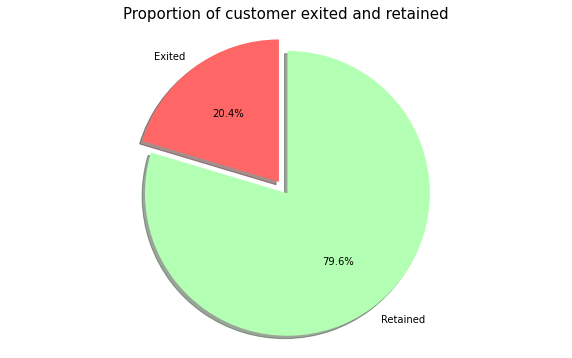

In [14]:
my_labels = ['Exited','Retained']
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, labels=my_labels, autopct='%1.1f%%',
        shadow=True,explode=explode,startangle=90,colors=["#ff6666","#b3ffb3"])
ax1.axis('equal')
plt.title("Proportion of customer exited and retained", size = 15)
plt.show()

###### So, around of 20% of the clients exited the bank, while around 80% stayed. As the goal here is to identify which of the customers are at higher risk to discontinue their services with the bank, we are dealing with a classification problem.

In [15]:
Num_Female =len(df[df['Gender']=='Female']['Gender'])
Female_per= round(((Num_Female/len(df['Exited']))*100),2)
print("Number of female in the bank:-",Num_Female)
print("Percentage of female in the bank:-",Female_per,"%")
print("==================================================")
Num_Male =len(df[df['Gender']=='Male']['Gender'])
Male_per= round(((Num_Male/len(df['Gender']))*100),2)
print("Number of male in the bank:-",Num_Male)
print("Percentage of male in the the bank:-",Male_per,"%")


Number of female in the bank:- 4543
Percentage of female in the bank:- 45.43 %
Number of male in the bank:- 5457
Percentage of male in the the bank:- 54.57 %


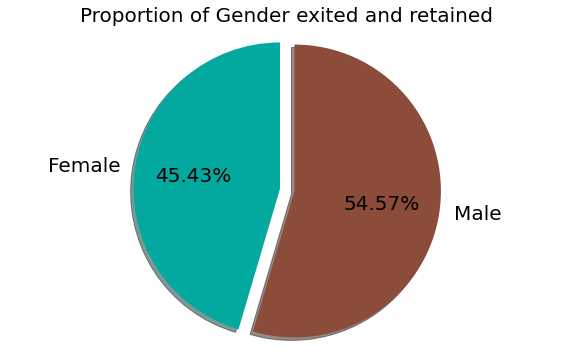

In [16]:
my_labels = ['Female','Male']
sizes = [df.Exited[df['Gender']=='Female'].count(),df.Exited[df['Gender']=='Male'].count()]
explode=(0,0.1)
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, labels=my_labels, autopct='%1.2f%%',
        shadow=True,explode=explode,startangle=90,colors=["#03A89E","#8B4C39"],textprops={'fontsize':20})
ax1.axis('equal')
plt.title("Proportion of Gender exited and retained", size = 20)
plt.show()

##### We can see that proportion of male(54.5%) in the bank are more than female(45.4%).

In [17]:
#Geographical Distribution of customers among three cities:

geography_count=df["Geography"].value_counts() #return different categorical values
geography_pct=geography_count/len(df.index) *100    #(ratio)
geography=pd.concat([geography_count,round(geography_pct,2)],axis=1).set_axis(['G_count','G_pct'],axis=1,inplace=False)
#print("Number of bank customers in all three cities:-"+"\n",geography_count)
#print("=======================================================")
#print("Percentage of bank customers in all three cities:-"+"\n",geography_pct)
#print("=======================================================")
geography

,G_count,G_pct
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


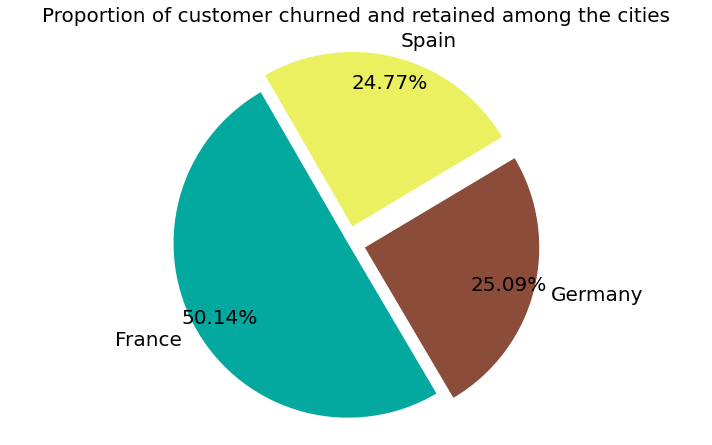

In [18]:
#Plotting GEOGRAPHICAL RATIOcolors=["#51f5ae","#ebf060","#ee78f0"]

labels=["France","Germany","Spain"]
colors=["#03A89E","#8B4C39","#ebf060"]
fig,ax1 = plt.subplots(figsize=(10,6))
explode = (0,0.1,0.1)
ax1.pie(geography_pct,colors = colors, labels=labels,
        autopct='%0.2f%%',explode=explode,pctdistance=0.85,startangle=120,textprops={'fontsize':20})

ax1.axis('equal') 
#plt.title('Ratio of Bank Customers in three different cities')
plt.tight_layout()
plt.title("Proportion of customer churned and retained among the cities", size = 20)
plt.show()

##### There are three countries in the dataset France, Spain and Germany.In which largest ratio of customers are from France which is 50.14% and 25% from Germany and rest of the customers are from Spain.

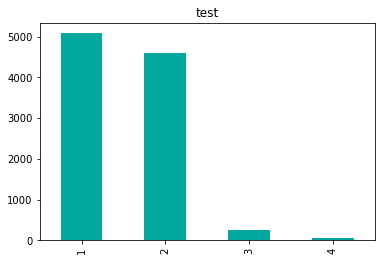

In [19]:
df['NumOfProducts'].value_counts().plot(kind="bar", title="test",color="#03A89E")

##### We can see that almost 50% of the customers used only one product followed by two number of products.

In [20]:
salary_min=(df[df["EstimatedSalary"]<50000])
salary_max=df[df["EstimatedSalary"]>50000]
salary_min_count=len(df[df["EstimatedSalary"]<50000])
salary_max_count=len(df[df["EstimatedSalary"]>50000])
print("No of Customers who have salary less than 50000:- ",salary_min_count)
print("No of Customers who have salary more than 50000:- ",salary_max_count)

No of Customers who have salary less than 50000:-  2453
No of Customers who have salary more than 50000:-  7547


In [21]:
salary_min_pct=salary_min_count/len(df.index)*100
salary_max_pct=salary_max_count/len(df.index)*100
print("(salary < 50,000) % :- {}".format(salary_min_pct))
print("(salary > 50,000) % :- {}".format(salary_max_pct))


(salary < 50,000) % :- 24.529999999999998
(salary > 50,000) % :- 75.47


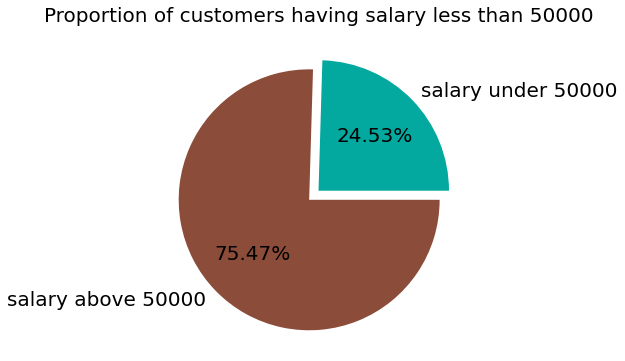

In [22]:
labels=["salary under 50000","salary above 50000"]
data=[salary_min_pct,salary_max_pct]
fig= plt.subplots(figsize=(10,6))
explode=(0,0.1)
colors=["#03A89E","#8B4C39"]
plt.pie(data,labels=labels,colors=colors,explode=explode,autopct="%0.2f%%",textprops={'fontsize':20})
plt.title("Proportion of customers having salary less than 50000", size = 20)
plt.show()

#### We can see that the percentage of customers having salary more than 50,000 are 75% and below are approx 25%.

In [23]:
# Number of customers has Credit Cards
HasCrCard_count=df["HasCrCard"].value_counts() 
HasCrCard_pct=HasCrCard_count/len(df.index) *100    #(ratio)
HasCrCard=pd.concat([HasCrCard_count,round(HasCrCard_pct,2)],axis=1).set_axis(['H_count','H_pct'],axis=1,inplace=False)
HasCrCard


,H_count,H_pct
1,7055,70.55
0,2945,29.45


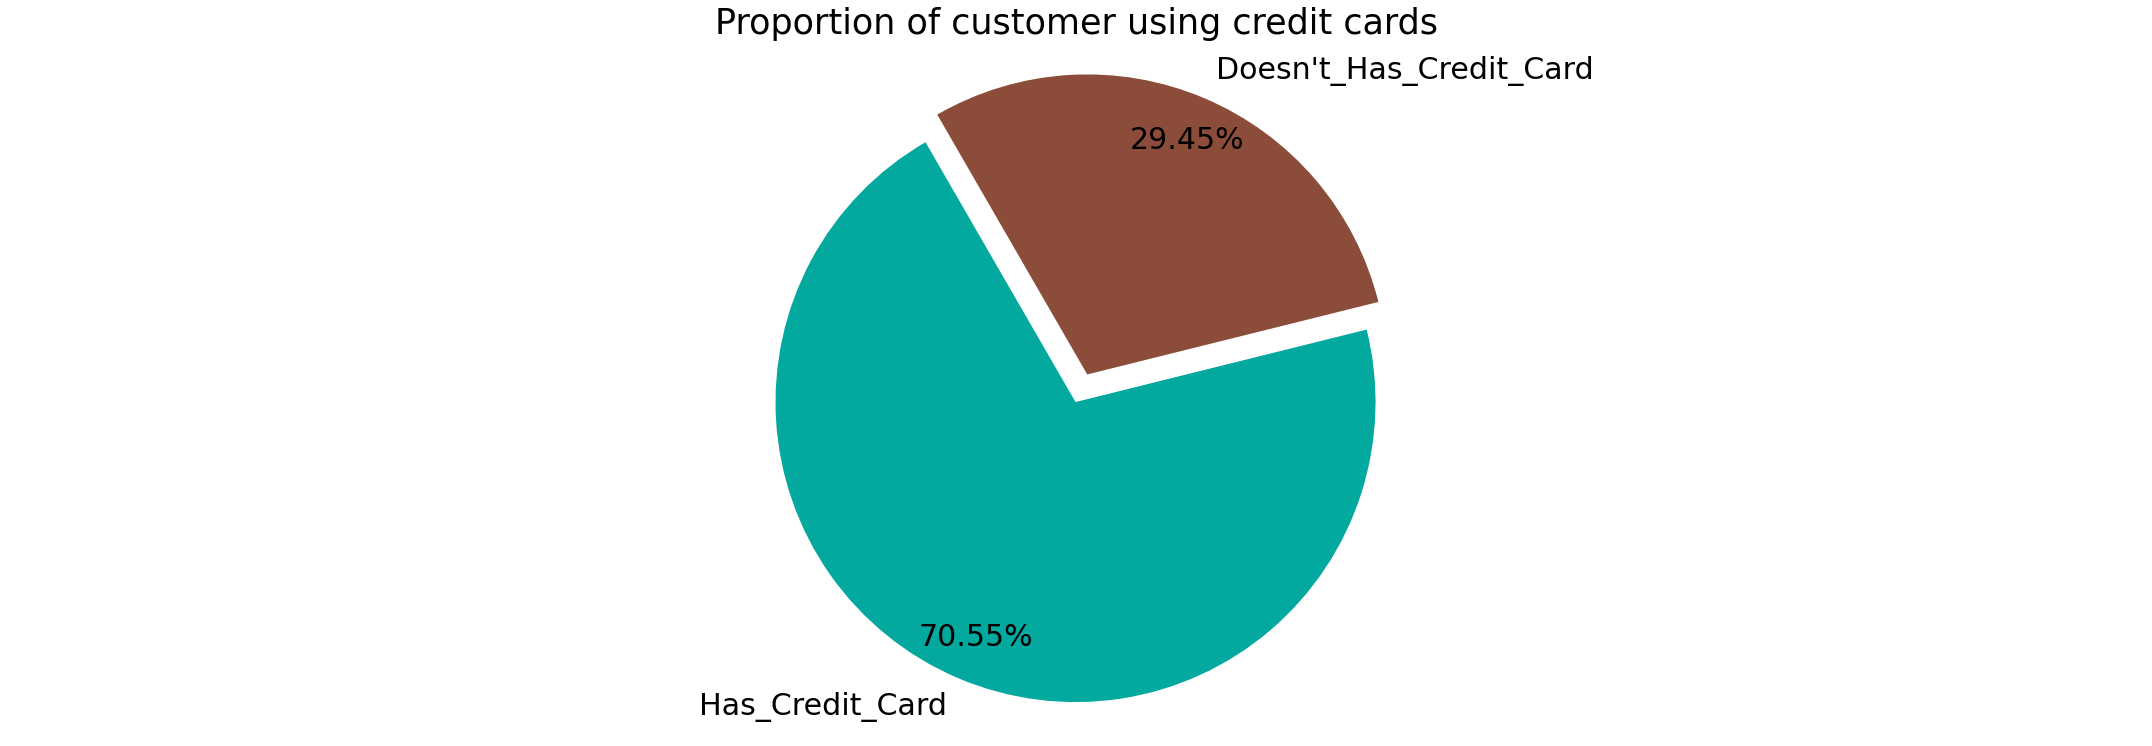

In [24]:
#Ratio of who has credit cards and who dont have credit cards
labels=["Has_Credit_Card","Doesn't_Has_Credit_Card"]
colors=["#03A89E","#8B4C39"]
fig,ax1 = plt.subplots(figsize=(30,10))
explode=(0,0.1)
ax1.pie(HasCrCard_pct,colors = colors, labels=labels,
        autopct='%0.2f%%',explode=explode,pctdistance=0.85,startangle=120,textprops={'fontsize':30})

ax1.axis('equal') 
#plt.title('Ratio of Bank Customers in three different cities')
plt.tight_layout()
plt.title("Proportion of customer using credit cards", size = 35)
plt.show()



#### Number of customers using credit card is comparatively more than number of customers who doesn't use cards

In [25]:
# Number of customers has Credit Cards
ActiveMember_count=df["IsActiveMember"].value_counts() 
ActiveMember_pct=ActiveMember_count/len(df.index) *100    #(ratio)
ActiveMember=pd.concat([ActiveMember_count,round(ActiveMember_pct,2)],axis=1).set_axis(['H_count','H_pct'],axis=1,inplace=False)
ActiveMember

,H_count,H_pct
1,5151,51.51
0,4849,48.49


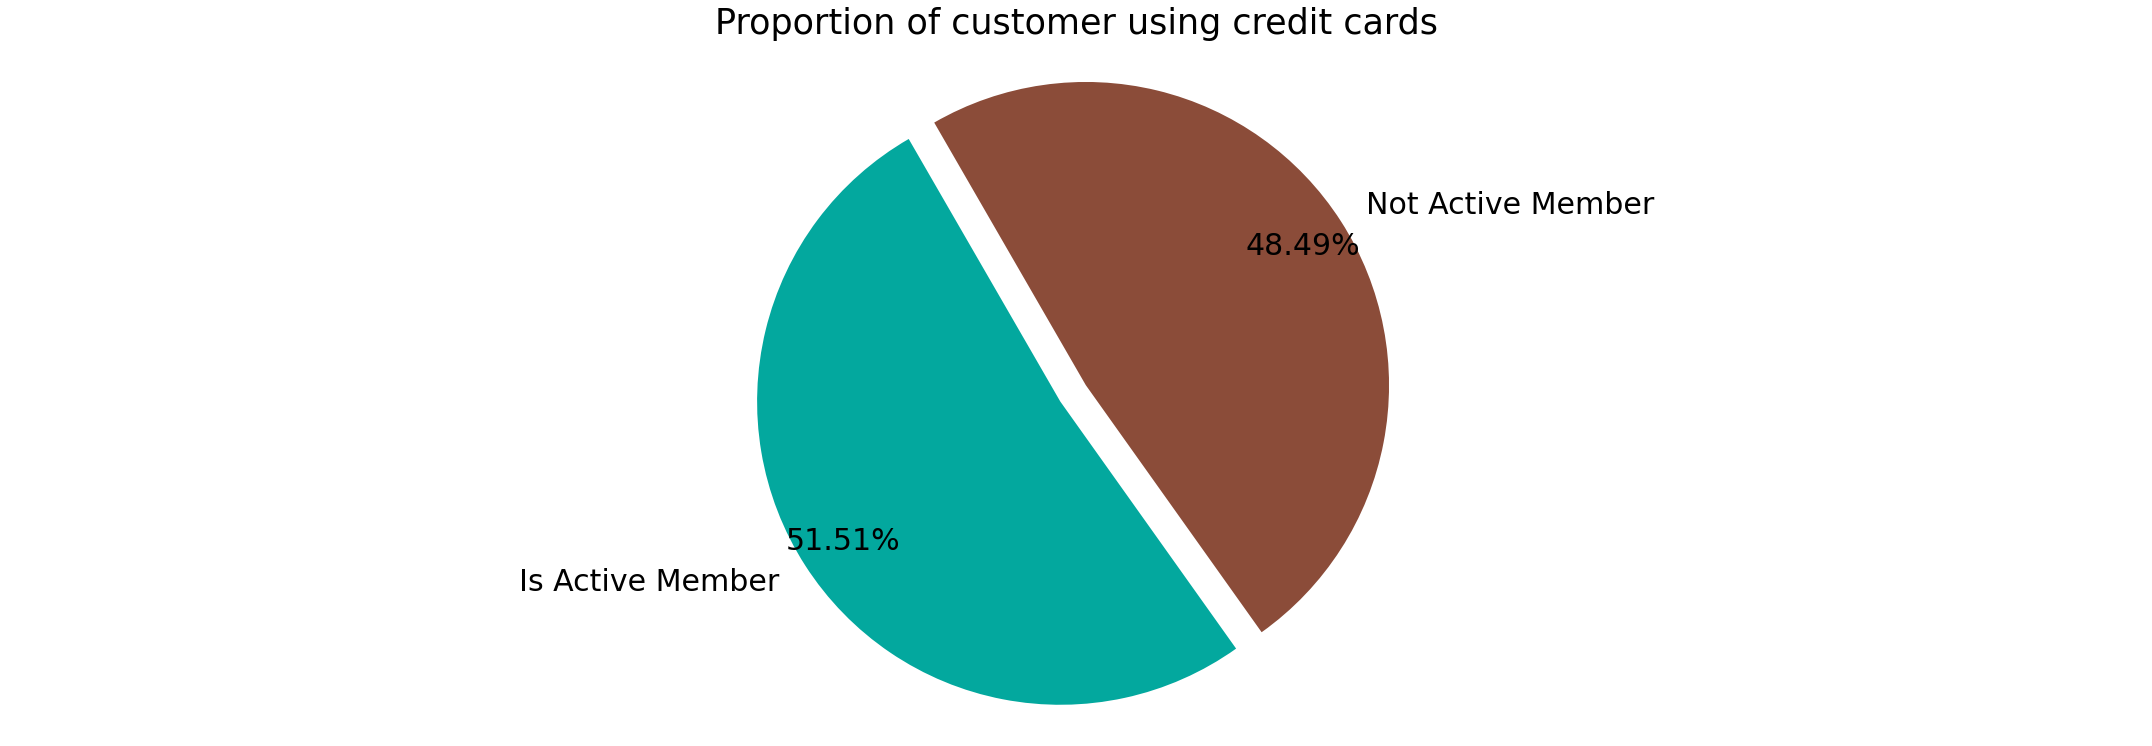

In [26]:
#Ratio of who has credit cards and who dont have credit cards
labels=["Is Active Member","Not Active Member"]
colors=["#03A89E","#8B4C39"]
fig,ax1 = plt.subplots(figsize=(30,10))
explode=(0,0.1)
ax1.pie(ActiveMember_pct,colors = colors, labels=labels,
        autopct='%0.2f%%',explode=explode,pctdistance=0.85,startangle=120,textprops={'fontsize':30})

ax1.axis('equal') 
#plt.title('Ratio of Bank Customers in three different cities')
plt.tight_layout()
plt.title("Proportion of customer using credit cards", size = 35)
plt.show()


##### Here we can see almost 50-50% ratio of customers who are active and inactive.

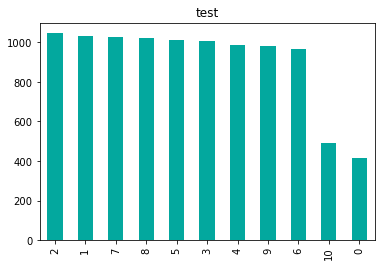

In [27]:
df['Tenure'].value_counts().plot(kind="bar", title="test",color="#03A89E")

##### We can see that best tenure is between 2 to 8 years.

# ** Exploratory Data Analysis
 Finding relationship of features with target 

### Genderwise Churning of Customers 

In [29]:
Num_Female_Retain=len(df_retain[df_retain['Gender']=='Female']['Gender'])
print("Number of female exited from the bank:-",Num_Female_Retain)
Female_retain_per=round(((Num_Female_Retain/len(df['Exited']))*100),2)
print("Percentage of female exited from the bank:-",Female_retain_per,"%")
print("==================================================")

Num_Male_Retain=len(df_retain[df_retain['Gender']=='Male']['Gender'])
print("Number of male exited from the bank:-",Num_Male_Retain)
Male_retain_per=round(((Num_Male_Retain/len(df['Exited']))*100),2)
print("Percentage of male exited from the bank:-",Male_retain_per,"%")
print("==================================================")

Number of female exited from the bank:- 3404
Percentage of female exited from the bank:- 34.04 %
Number of male exited from the bank:- 4559
Percentage of male exited from the bank:- 45.59 %


In [30]:
Num_Female_Exit=len(df_exit[df_exit['Gender']=='Female']['Gender'])
print("Number of female exited from the bank:-",Num_Female_Exit)
Female_exit_per=round(((Num_Female_Exit/len(df['Exited']))*100),2)
print("Percentage of female exited from the bank:-",Female_exit_per,"%")
print("==================================================")

Num_male_Exit=len(df_exit[df_exit['Gender']=='Male']['Gender'])
print("Number of male exited from the bank:-",Num_male_Exit)
Male_exit_per=round(((Num_male_Exit/len(df['Exited']))*100),2)
print("Percentage of male exited from the bank:-",Male_exit_per,"%")
print("==================================================")

Number of female exited from the bank:- 1139
Percentage of female exited from the bank:- 11.39 %
Number of male exited from the bank:- 898
Percentage of male exited from the bank:- 8.98 %


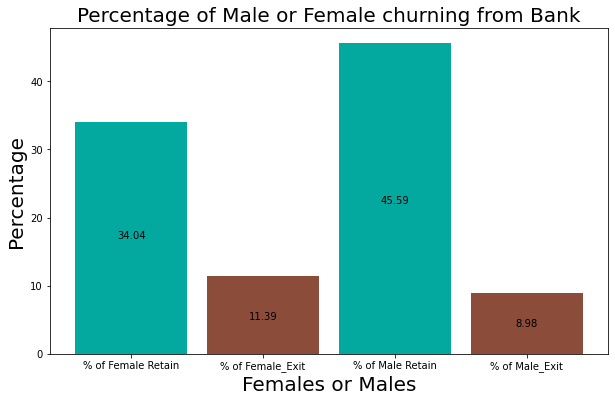

In [31]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
if __name__ == '__main__':
    
        # creating data on which bar chart will be plot
        x=['% of Female Retain','% of Female_Exit','% of Male Retain','% of Male_Exit']
        y=[34.04,11.39,45.59,8.98]
        
        # setting figure size by using figure() function 
        plt.figure(figsize = (10,6))
        colors = ["#03A89E","#8B4C39"]
        width=0.85
      
        # making the bar chart on the data
        plt.bar(x, y,color=colors,width=width)
      
        # calling the function to add value labels
        addlabels(x, y)
      
        # giving title to the plot
        plt.title('Percentage of Male or Female churning from Bank',size=20)
      
        # giving X and Y labels
        plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
        plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
        plt.xlabel('Females or Males', fontsize=20)
        plt.ylabel('Percentage', fontsize=20)
      
        # visualizing the plot
        plt.show()

#### Even though the percentage of female is less in the bank but there are higher number of females who are churning from bank.

### Countrywise Churning of Customers 

In [32]:
# Count and percentage of customers retained among three cities 
geography_retain_count=df_retain["Geography"].value_counts() #return different categorical values
geography_retain_pct=geography_retain_count/len(df['Exited']) *100    #(ratio)
geography_retain=pd.concat([geography_retain_count,round(geography_retain_pct,2)],axis=1).set_axis(['G_count','G_pct'],axis=1,inplace=False)
#print("Number of customers exit from bank in all three cities:-"+"\n",geography_exit_count)
#print("=======================================================")
#print("Percentage of customers exit from bank in all three cities:-"+"\n",geography_exit_pct)
#print("=======================================================")
geography_retain

,G_count,G_pct
France,4204,42.04
Spain,2064,20.64
Germany,1695,16.95


In [33]:
# Count and percentage of customers exited among three cities 
geography_exit_count=df_exit["Geography"].value_counts() #return different categorical values
geography_exit_pct=geography_exit_count/len(df['Exited']) *100    #(ratio)
geography_exit=pd.concat([geography_exit_count,round(geography_exit_pct,2)],axis=1).set_axis(['G_count','G_pct'],axis=1,inplace=False)
#print("Number of customers exit from bank in all three cities:-"+"\n",geography_exit_count)
#print("=======================================================")
#print("Percentage of customers exit from bank in all three cities:-"+"\n",geography_exit_pct)
#print("=======================================================")
geography_exit

,G_count,G_pct
Germany,814,8.14
France,810,8.10
Spain,413,4.13


Text(0.5, 1.0, 'Geographical distribution of customers retained and exited')

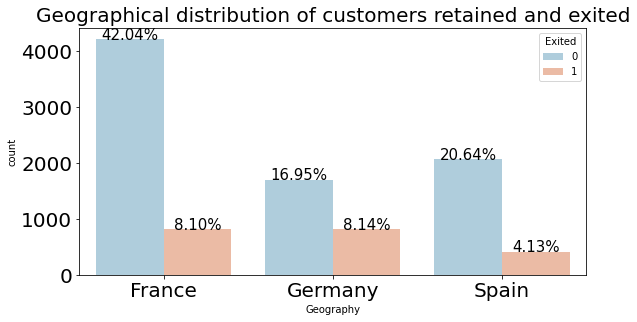

In [34]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
total = len(df.Geography)
g=sns.countplot(df['Geography'],hue=df.Exited,palette='RdBu_r')

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15)
    
plt.title("Geographical distribution of customers retained and exited",size=20)

### Churning of Customers who hold cards or not

Text(0.5, 1.0, 'Distribution of customers retained and exited who hold Credit Cards')

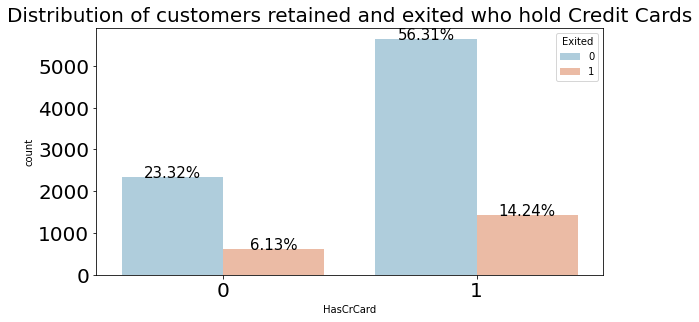

In [35]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
total = len(df.HasCrCard)
g=sns.countplot(df['HasCrCard'],hue=df.Exited,palette='RdBu_r')

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15)
    
plt.title("Distribution of customers retained and exited who hold Credit Cards",size=20)

### Churning of Customers who Active or not

Text(0.5, 1.0, 'Activeness of customers who retained and exited ')

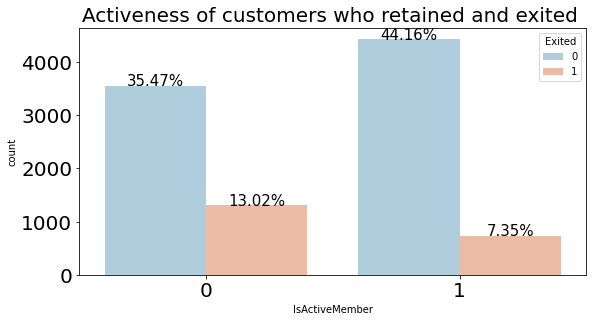

In [36]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
total = len(df.IsActiveMember)
g=sns.countplot(df['IsActiveMember'],hue=df.Exited,palette='RdBu_r')

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15)
    
plt.title("Activeness of customers who retained and exited ",size=20)

### Productwise Churning of Customers 

Text(0.5, 1.0, 'Number of products used by customers who retained and exited ')

posx and posy should be finite values
posx and posy should be finite values


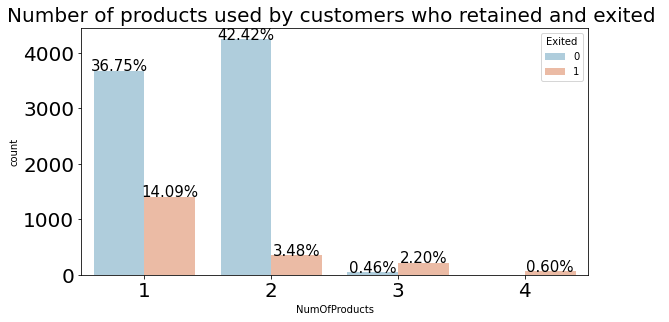

In [37]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
total = len(df.NumOfProducts)
g=sns.countplot(df['NumOfProducts'],hue=df.Exited,palette='RdBu_r')

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15)
    
plt.title("Number of products used by customers who retained and exited ",size=20)

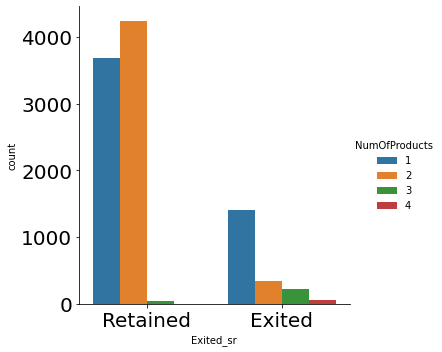

In [38]:
df["Exited_sr"]=df["Exited"].map({1:'Exited',0:"Retained"})
sns.catplot("Exited_sr",data=df,kind="count",hue="NumOfProducts")

###### Customers who were using only one product has exited more and same with customers with more than 4 product also got exit from the bank.Customers with 2 products has good retention value.

### Agewise Churning of Customers 

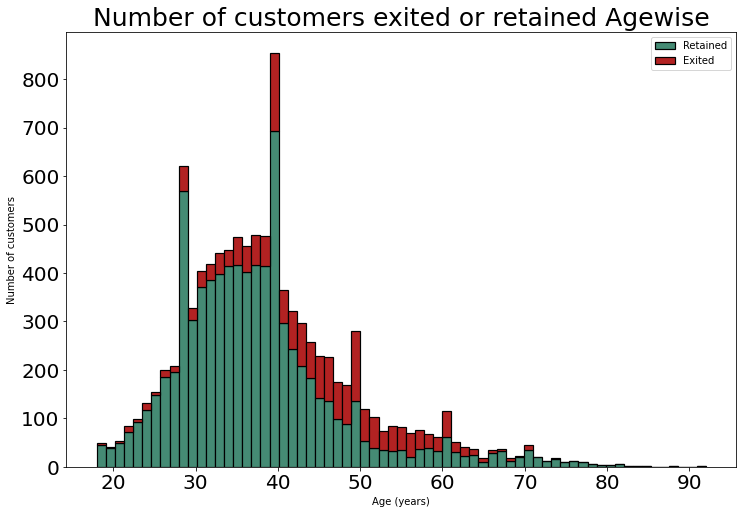

In [39]:
# Number of customers exited or retained Agewise
figure = plt.figure(figsize=(12,8))
plt.hist([
        df[(df.Exited==0)]['Age'],
        df[(df.Exited==1)]['Age']
        ], 
         stacked=True, color = ['#458B74','#B22222'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.title("Number of customers exited or retained Agewise", size = 25)
plt.legend()

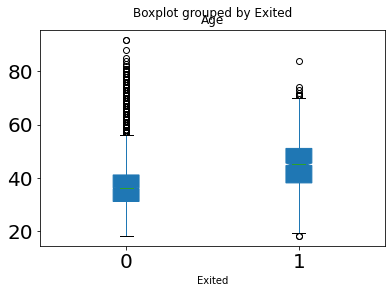

In [40]:
#Check the Age distribution at customer status split
df.boxplot(by='Exited',column=['Age'],grid=False,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True)

##### Customers between the age of 45 to 65 are more likely to churn.

### Churning of Customers based on Credit Score

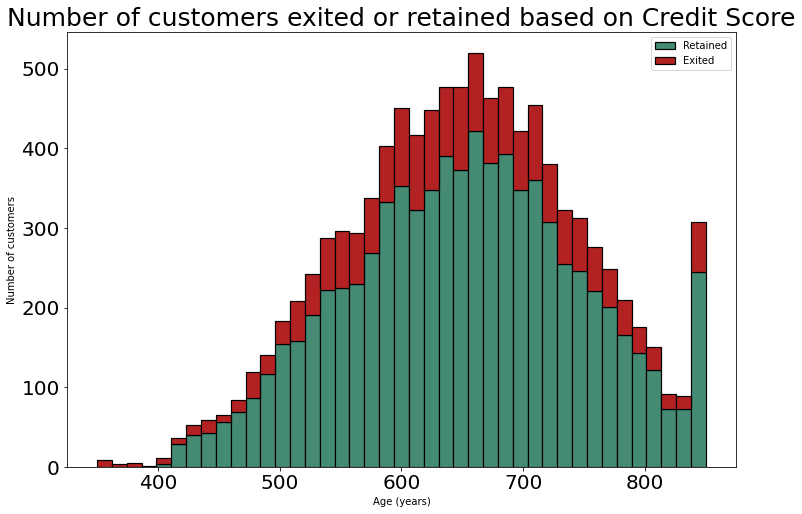

In [41]:
# Number of customers exited or retained based on Credit Score
figure = plt.figure(figsize=(12,8))
plt.hist([
        df[(df.Exited==0)]['CreditScore'],
        df[(df.Exited==1)]['CreditScore']
        ], 
         stacked=True, color = ['#458B74','#B22222'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.title("Number of customers exited or retained based on Credit Score", size = 25)
plt.legend()

### Tenurewise Churning of Customers 

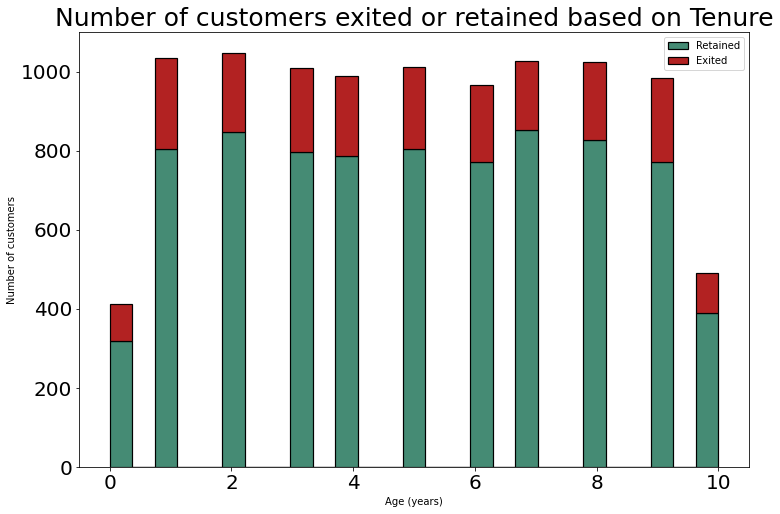

In [42]:
# Number of customers exited or retained based on Tenure
figure = plt.figure(figsize=(12,8))
plt.hist([
        df[(df.Exited==0)]['Tenure'],
        df[(df.Exited==1)]['Tenure']
        ], 
         stacked=True, color = ['#458B74','#B22222'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.title("Number of customers exited or retained based on Tenure", size = 25)
plt.legend()

### Churning of Customers based on Estimated Salary

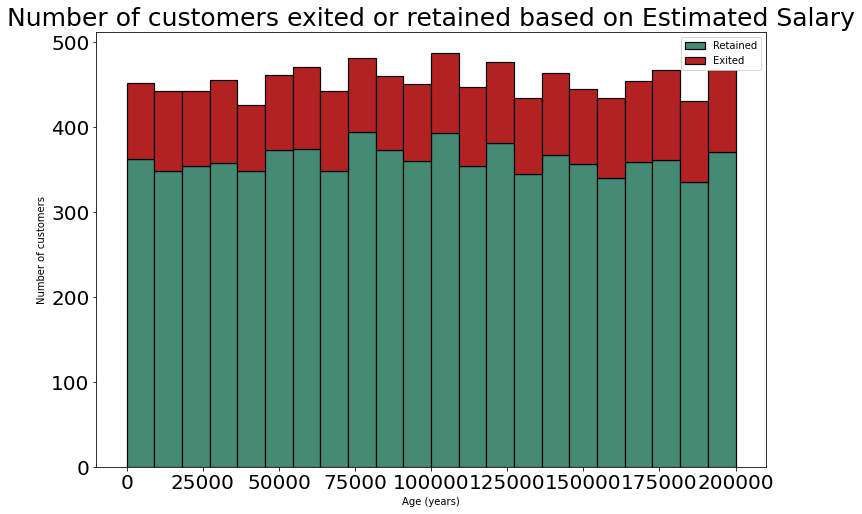

In [43]:
# Number of customers exited or retained based on Salary
figure = plt.figure(figsize=(12,8))
plt.hist([
        df[(df.Exited==0)]['EstimatedSalary'],
        df[(df.Exited==1)]['EstimatedSalary']
        ], 
         stacked=True, color = ['#458B74','#B22222'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.title("Number of customers exited or retained based on Estimated Salary", size = 25)
plt.legend()

### Churning of Customers based on Balance

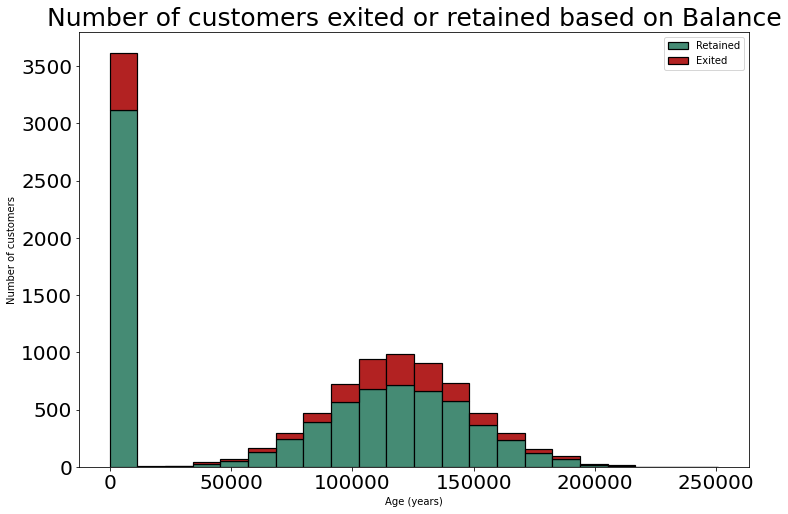

In [44]:
# Number of customers exited or retained based on Balance
figure = plt.figure(figsize=(12,8))
plt.hist([
        df[(df.Exited==0)]['Balance'],
        df[(df.Exited==1)]['Balance']
        ], 
         stacked=True, color = ['#458B74','#B22222'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.title("Number of customers exited or retained based on Balance", size = 25)
plt.legend()


### From the tables and plots above, we can have some insights:

1.As for gender, women are lower in number than the men, but have a higher rate to close the account.

2.There is a higher rate of exited clients in Germany(32%, which is about 2x higher), and lower in Spain and France (around 16% each).

3.On age, customer below 40 and above 65 years old have a tendency to keep their account.

4.Has or not credit card does not impact on the decision to stay in the bank (both groups has 20% of exited customers)

5.Non active members tend to discontinue their services with a bank compared with the active clients (27% vs 14%).

6.The dataset has 96% of clients with 1 or 2 product, and customers with 1 product only have a higher rate to close the account than those with 2 products (around 3x higher).

7.Estimated Salary does not seem to affect the churn rate

In [45]:
df.corr()

,CustomerId,CreditScore,Age,Balance,EstimatedSalary
CustomerId,1.000000,0.005308,0.009497,-0.012419,0.015271
CreditScore,0.005308,1.000000,-0.003965,0.006268,-0.001384
Age,0.009497,-0.003965,1.000000,0.028308,-0.007201
Balance,-0.012419,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,0.015271,-0.001384,-0.007201,0.012797,1.000000


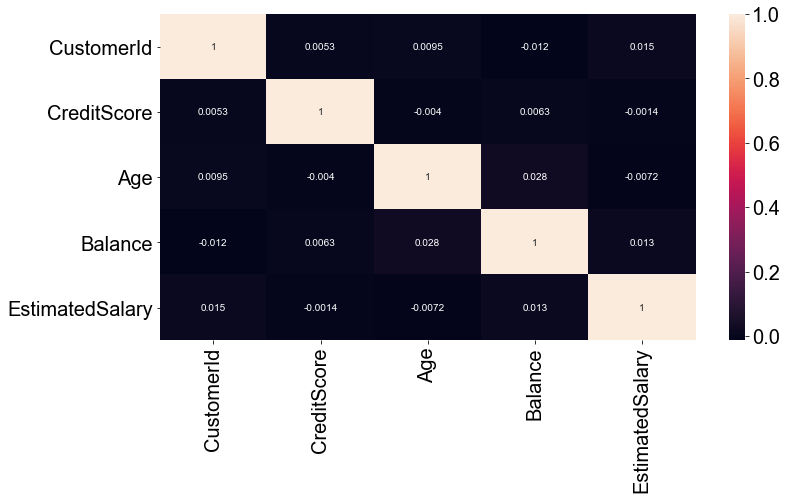

In [46]:
plt.figure(figsize=(12,6))
 
ax = sns.heatmap(df.corr(),annot=True)
 
sns.set(font_scale=1) # set fontsizeplt.scatter(df.corr)